In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Transaction_data.csv', index_col=0)

df.head()

,merchant_id,recorded_date,TIME,issuer_id,amount
0,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-02,0 days 03:46:45,b92056d9-092b-4374-a84f-89304b67dec1,2.0
1,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-06,0 days 03:13:31,b92056d9-092b-4374-a84f-89304b67dec1,1.0
2,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-12,0 days 17:11:42,b92056d9-092b-4374-a84f-89304b67dec1,1.6
3,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-13,0 days 20:15:57,b92056d9-092b-4374-a84f-89304b67dec1,2.0
4,e9b9b629-1a76-42ce-9a73-60f395bd6717,2024-03-15,0 days 14:23:05,b92056d9-092b-4374-a84f-89304b67dec1,5.0


In [3]:
df['TIME'] = df['TIME'].apply(lambda x: x.split(' ')[2])

In [4]:
df['datetime'] = pd.to_datetime(df['recorded_date'] + ' ' + df['TIME'])
df.drop(['recorded_date','TIME'], axis=1, inplace=True)

In [5]:
df.head()

,merchant_id,issuer_id,amount,datetime
0,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,2.0,2024-03-02 03:46:45
1,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,1.0,2024-03-06 03:13:31
2,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,1.6,2024-03-12 17:11:42
3,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,2.0,2024-03-13 20:15:57
4,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,5.0,2024-03-15 14:23:05


In [6]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['datetime'].dt.hour.map(categorize_time)
df.head()

,merchant_id,issuer_id,amount,datetime,time_of_day
0,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,2.0,2024-03-02 03:46:45,Night
1,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,1.0,2024-03-06 03:13:31,Night
2,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,1.6,2024-03-12 17:11:42,Evening
3,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,2.0,2024-03-13 20:15:57,Evening
4,e9b9b629-1a76-42ce-9a73-60f395bd6717,b92056d9-092b-4374-a84f-89304b67dec1,5.0,2024-03-15 14:23:05,Afternoon


In [7]:
df_nep = df[df['issuer_id'] != "b92056d9-092b-4374-a84f-89304b67dec1"]
df_npci = df[df['issuer_id'] == "b92056d9-092b-4374-a84f-89304b67dec1"]

In [8]:
df_nep

,merchant_id,issuer_id,amount,datetime,time_of_day
5,bb11708d-0c14-473b-b312-b5ad0568215c,e17695d5-eea1-43d4-b2fe-d7447ab7870a,1814.0,2024-02-28 15:17:31,Afternoon
6,bb11708d-0c14-473b-b312-b5ad0568215c,cf0e5a42-5aef-4e89-9a1d-ddabeb94a990,712.0,2024-02-28 12:48:24,Afternoon
7,bb11708d-0c14-473b-b312-b5ad0568215c,28125faa-cc41-457d-8966-60849300b80a,1627.0,2024-02-28 15:16:34,Afternoon
8,bb11708d-0c14-473b-b312-b5ad0568215c,bb6946e4-3b21-4185-ac59-e0a2dd7d9769,638.0,2024-02-28 14:32:00,Afternoon
9,bb11708d-0c14-473b-b312-b5ad0568215c,cf0e5a42-5aef-4e89-9a1d-ddabeb94a990,550.0,2024-02-28 14:11:30,Afternoon
...,...,...,...,...,...
385840,1862671b-e98a-4276-bf24-37e607690619,15a5d3ba-99d3-43c4-9594-099f6d48f96b,30000.0,2024-03-31 12:15:23,Afternoon
385844,97a7eb18-2288-4fbf-bc6d-56d1eaff7f6e,e17695d5-eea1-43d4-b2fe-d7447ab7870a,100.0,2024-03-18 17:05:56,Evening
385845,97a7eb18-2288-4fbf-bc6d-56d1eaff7f6e,79512008-fb07-4968-b096-091a6575f732,10.0,2024-03-18 16:29:47,Afternoon
385871,e838bcb3-b7c1-4897-940b-951122fed104,cf0e5a42-5aef-4e89-9a1d-ddabeb94a990,1.0,2024-03-31 20:16:56,Evening


In [9]:
nep_grouped_stats = df_nep.groupby('merchant_id').agg({
    'amount': ['count', 'sum', 'min', 'max', 'mean', 'std'],
    'time_of_day': lambda x: pd.Series.mode(x).iloc[0]  
})

In [10]:
nep_grouped_stats.columns = ['count','sum','min','max','mean','std','time_of_day']

In [11]:
nep_grouped_stats

,count,sum,min,max,mean,std,time_of_day
merchant_id,,,,,,,
001cb5a9-0d00-42ef-90e4-f25b0c964bbf,1410,773261.00,3.0,17512.0,548.412057,956.881299,Afternoon
00369301-6b29-41c3-b37a-5d1f9b782d9b,269,66405.00,10.0,2000.0,246.858736,266.593496,Afternoon
00524c08-cbbe-4ccc-a0c4-8d1bef218908,36,23980.00,10.0,6000.0,666.111111,1500.840770,Evening
009c1279-8a1a-40cf-a83b-ccc05420f570,1,16300.00,16300.0,16300.0,16300.000000,NaN,Afternoon
00b01a2e-285f-48b1-9021-0628f8a43125,160,383002.63,1.1,18200.0,2393.766437,2643.836947,Evening
...,...,...,...,...,...,...,...
fe3a77f5-8db4-4d9b-98b2-7a3156f46d46,123,57800.00,10.0,2900.0,469.918699,547.662314,Evening
fe7d0139-1e75-41dc-adb4-fc8c3e354165,10,30520.00,120.0,14000.0,3052.000000,4045.125462,Evening
fe822416-7ed2-4529-8df4-83aa6e49745c,426,410315.71,30.0,12000.0,963.182418,1103.847463,Evening


In [12]:
npci_grouped_stats = df_npci.groupby('merchant_id').agg({
    'amount': ['count', 'sum', 'min', 'max', 'mean', 'std'],
    'time_of_day': lambda x: pd.Series.mode(x).iloc[0]  
})

In [13]:
npci_grouped_stats.columns = ['count','sum','min','max','mean','std','time_of_day']

In [14]:
npci_grouped_stats

,count,sum,min,max,mean,std,time_of_day
merchant_id,,,,,,,
001cb5a9-0d00-42ef-90e4-f25b0c964bbf,13,2185.0,65.0,385.0,168.076923,94.660324,Evening
00369301-6b29-41c3-b37a-5d1f9b782d9b,3,595.0,60.0,360.0,198.333333,151.354991,Afternoon
00524c08-cbbe-4ccc-a0c4-8d1bef218908,1,20.0,20.0,20.0,20.000000,NaN,Morning
009c1279-8a1a-40cf-a83b-ccc05420f570,3,20320.0,1600.0,16000.0,6773.333333,8010.126924,Evening
00b01a2e-285f-48b1-9021-0628f8a43125,2,720.0,325.0,395.0,360.000000,49.497475,Evening
...,...,...,...,...,...,...,...
fe3a77f5-8db4-4d9b-98b2-7a3156f46d46,3,1826.0,10.0,1416.0,608.666667,725.854898,Afternoon
fe7d0139-1e75-41dc-adb4-fc8c3e354165,12,73300.0,560.0,16000.0,6108.333333,5354.151887,Evening
fe822416-7ed2-4529-8df4-83aa6e49745c,2,800.0,200.0,600.0,400.000000,282.842712,Afternoon


In [15]:
df_merged = pd.concat([nep_grouped_stats, npci_grouped_stats], keys=['nep', 'npci'], names=['source']).reset_index(level=0)

In [16]:
merchant_stats = df_merged.groupby(['merchant_id', 'source']).agg({
    'count': 'mean',
    'sum': 'mean',
    'min': 'min',
    'max': 'max',
    'mean': 'mean', 
    'std': 'mean',   
    'time_of_day': lambda x: pd.Series.mode(x).iloc[0] 
}).unstack()

merchant_stats.columns = ['_'.join(col).strip() for col in merchant_stats.columns.values]
merchant_stats

,count_nep,count_npci,sum_nep,sum_npci,min_nep,min_npci,max_nep,max_npci,mean_nep,mean_npci,std_nep,std_npci,time_of_day_nep,time_of_day_npci
merchant_id,,,,,,,,,,,,,,
001cb5a9-0d00-42ef-90e4-f25b0c964bbf,1410.0,13.0,773261.00,2185.0,3.0,65.0,17512.0,385.0,548.412057,168.076923,956.881299,94.660324,Afternoon,Evening
00369301-6b29-41c3-b37a-5d1f9b782d9b,269.0,3.0,66405.00,595.0,10.0,60.0,2000.0,360.0,246.858736,198.333333,266.593496,151.354991,Afternoon,Afternoon
00524c08-cbbe-4ccc-a0c4-8d1bef218908,36.0,1.0,23980.00,20.0,10.0,20.0,6000.0,20.0,666.111111,20.000000,1500.840770,NaN,Evening,Morning
009c1279-8a1a-40cf-a83b-ccc05420f570,1.0,3.0,16300.00,20320.0,16300.0,1600.0,16300.0,16000.0,16300.000000,6773.333333,NaN,8010.126924,Afternoon,Evening
00b01a2e-285f-48b1-9021-0628f8a43125,160.0,2.0,383002.63,720.0,1.1,325.0,18200.0,395.0,2393.766437,360.000000,2643.836947,49.497475,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe3a77f5-8db4-4d9b-98b2-7a3156f46d46,123.0,3.0,57800.00,1826.0,10.0,10.0,2900.0,1416.0,469.918699,608.666667,547.662314,725.854898,Evening,Afternoon
fe7d0139-1e75-41dc-adb4-fc8c3e354165,10.0,12.0,30520.00,73300.0,120.0,560.0,14000.0,16000.0,3052.000000,6108.333333,4045.125462,5354.151887,Evening,Evening
fe822416-7ed2-4529-8df4-83aa6e49745c,426.0,2.0,410315.71,800.0,30.0,200.0,12000.0,600.0,963.182418,400.000000,1103.847463,282.842712,Evening,Afternoon


In [17]:
merchant_stats.dropna(inplace=True)

In [18]:
merchant_stats.columns

Index(['count_nep', 'count_npci', 'sum_nep', 'sum_npci', 'min_nep', 'min_npci',
       'max_nep', 'max_npci', 'mean_nep', 'mean_npci', 'std_nep', 'std_npci',
       'time_of_day_nep', 'time_of_day_npci'],
      dtype='object')

In [19]:
def compare_groups(data):
    results = {}
    nep_cols = ['count_nep', 'sum_nep', 'min_nep', 'max_nep', 'mean_nep','std_nep']
    npci_cols = ['count_npci', 'sum_npci', 'min_npci', 'max_npci', 'mean_npci','std_npci']
    
    for col1, col2 in zip(nep_cols, npci_cols):
        npci_greater_count = sum(data[col2] > data[col1])
        total_count = len(data)
        
        percentage_greater = (npci_greater_count / total_count) * 100
        
        results[(col1, col2)] = {
            'npci_greater_count': npci_greater_count,
            'total_count': total_count,
            'percentage_greater': percentage_greater
        }
    
    return results

In [20]:
results = compare_groups(merchant_stats)

In [21]:
for key, result in results.items():
    col1, col2 = key
    print(f"Comparison of {col1} and {col2}:")
    print(f"   Number of merchants where {col2} > {col1}: {result['npci_greater_count']} / {result['total_count']} ({result['percentage_greater']:.2f}%)")
    print()

Comparison of count_nep and count_npci:
   Number of merchants where count_npci > count_nep: 82 / 795 (10.31%)

Comparison of sum_nep and sum_npci:
   Number of merchants where sum_npci > sum_nep: 122 / 795 (15.35%)

Comparison of min_nep and min_npci:
   Number of merchants where min_npci > min_nep: 444 / 795 (55.85%)

Comparison of max_nep and max_npci:
   Number of merchants where max_npci > max_nep: 146 / 795 (18.36%)

Comparison of mean_nep and mean_npci:
   Number of merchants where mean_npci > mean_nep: 357 / 795 (44.91%)

Comparison of std_nep and std_npci:
   Number of merchants where std_npci > std_nep: 245 / 795 (30.82%)



In [22]:
def plot_distributions(df):
    # Iterate through each column
    for col in merchant_stats.drop(columns = ['std_nep', 'std_npci', 'time_of_day_nep', 'time_of_day_npci'], axis = 1).columns:
        plt.figure(figsize=(8, 5))
        df[col].plot(kind='hist', bins=100, density=True, alpha=0.75, label=col + ' histogram')
        df[col].plot(kind='kde', color='red', linewidth=2, label=col + ' KDE')
        plt.xlabel(col)
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

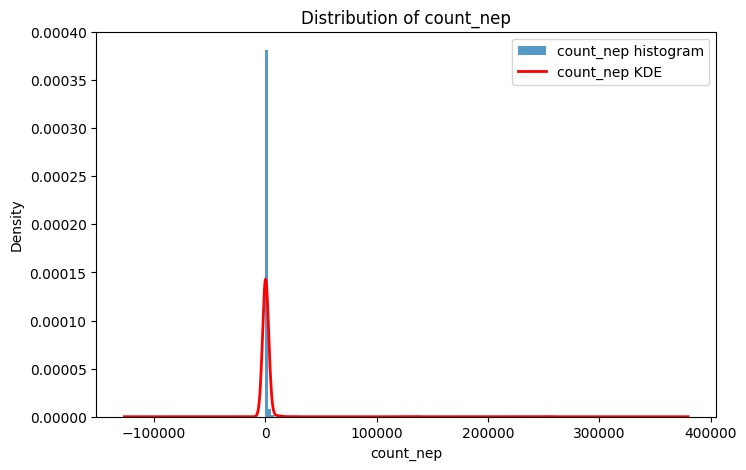

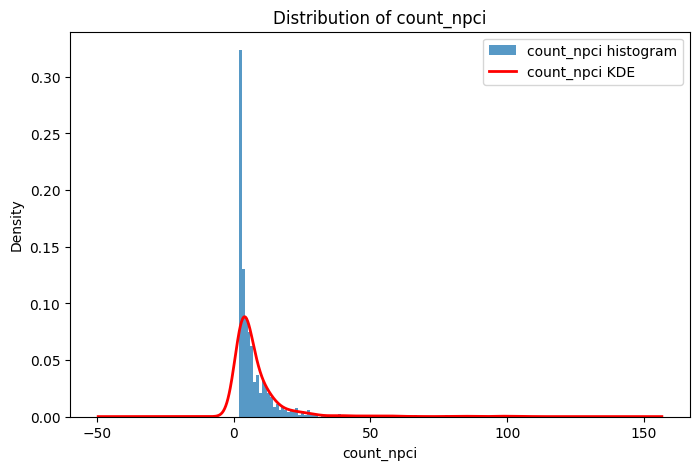

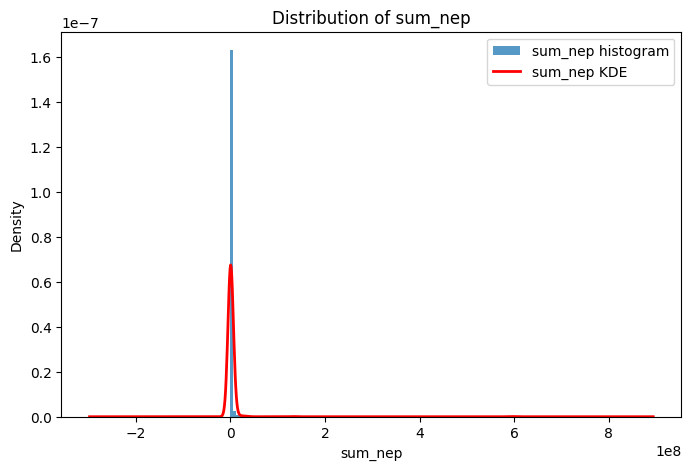

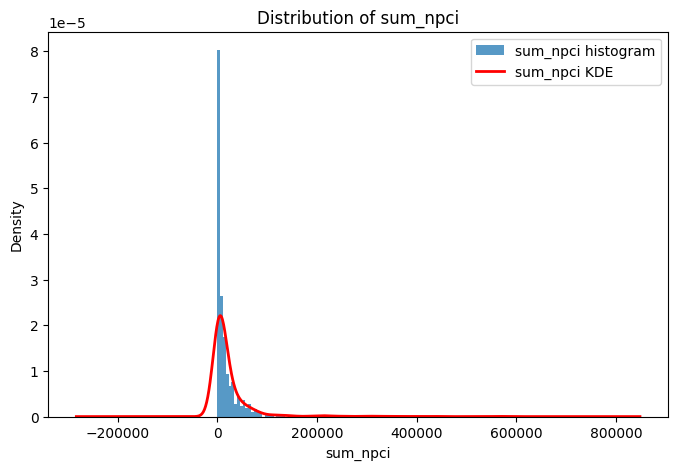

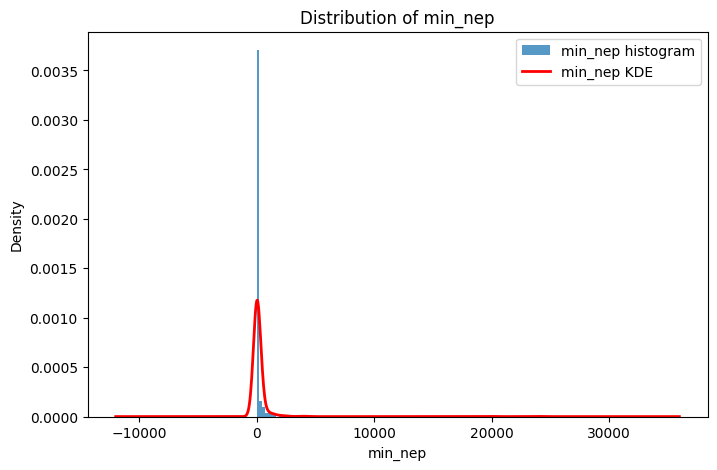

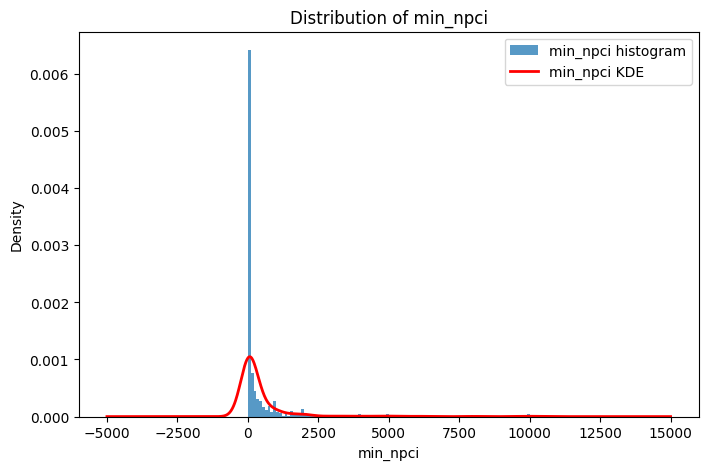

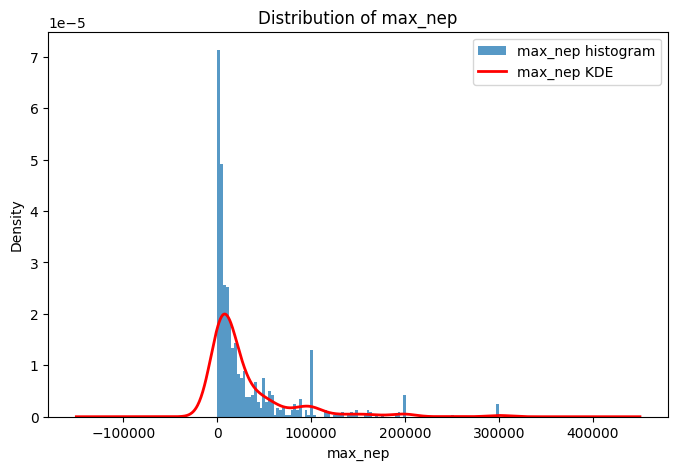

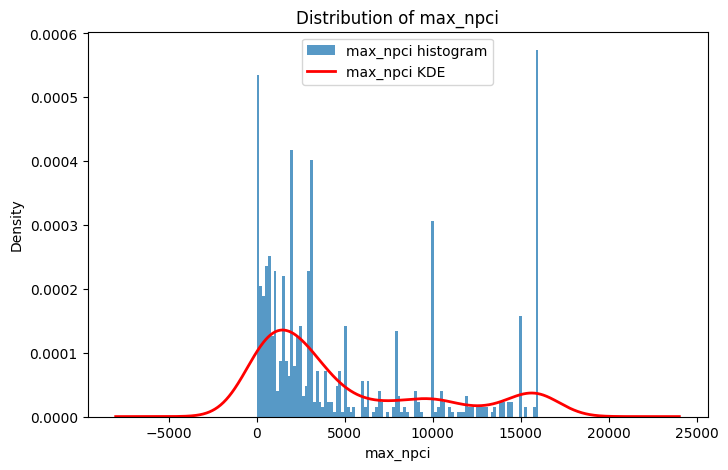

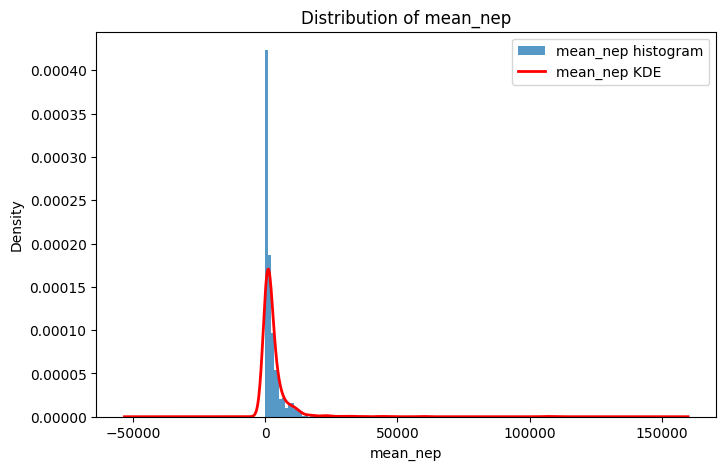

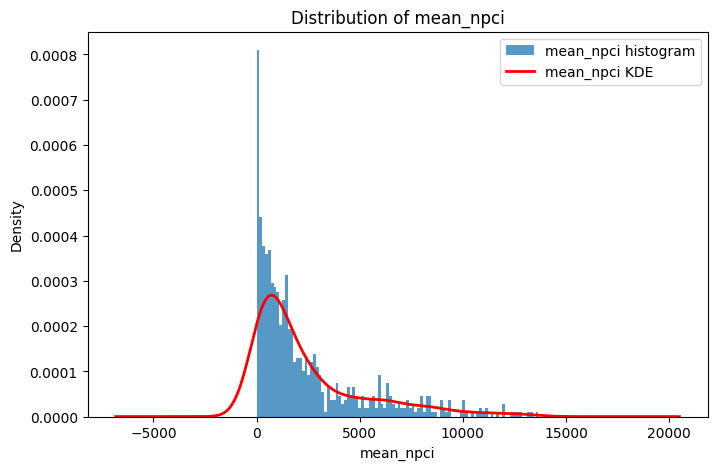

In [23]:
plot_distributions(merchant_stats)

In [24]:
merchant_stats_1 = merchant_stats.drop(columns=['time_of_day_nep', 'time_of_day_npci'])
merchant_stats_1.dropna(inplace=True)

In [25]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(merchant_stats_1)

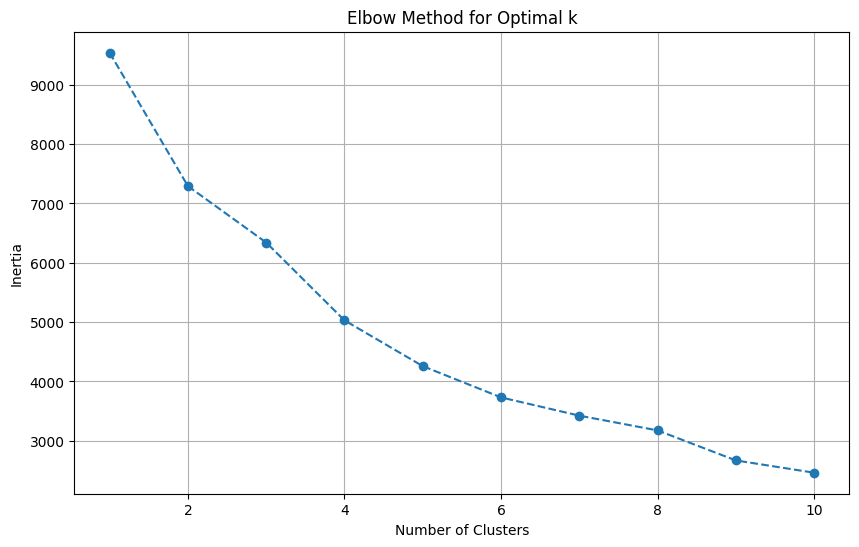

In [26]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show() 

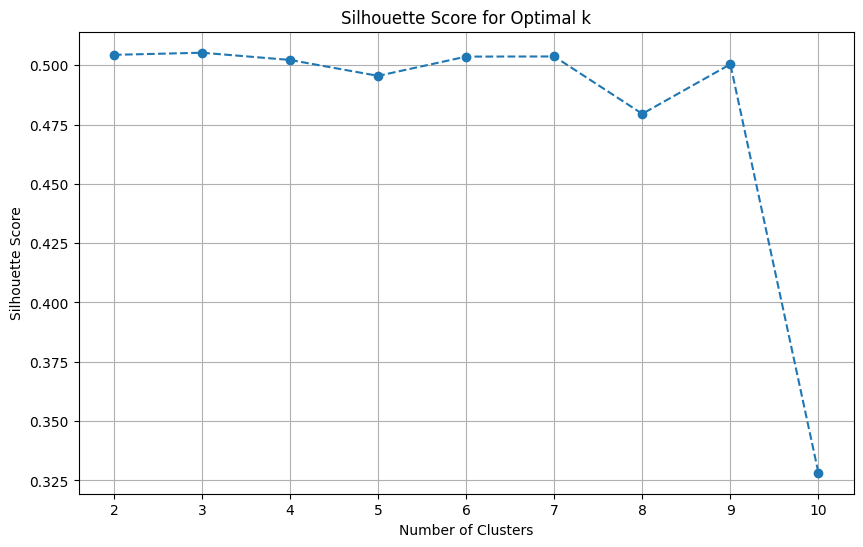

In [27]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    score = silhouette_score(normalized_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans.fit(normalized_data)

KMeans(n_clusters=4, random_state=42)

In [29]:
merchant_stats_1['cluster'] = kmeans.labels_

In [30]:
from sklearn import metrics


wcss = []
silhouette_scores = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_) 
    if i > 1:
        silhouette_scores.append(metrics.silhouette_score(normalized_data, kmeans.labels_))
        


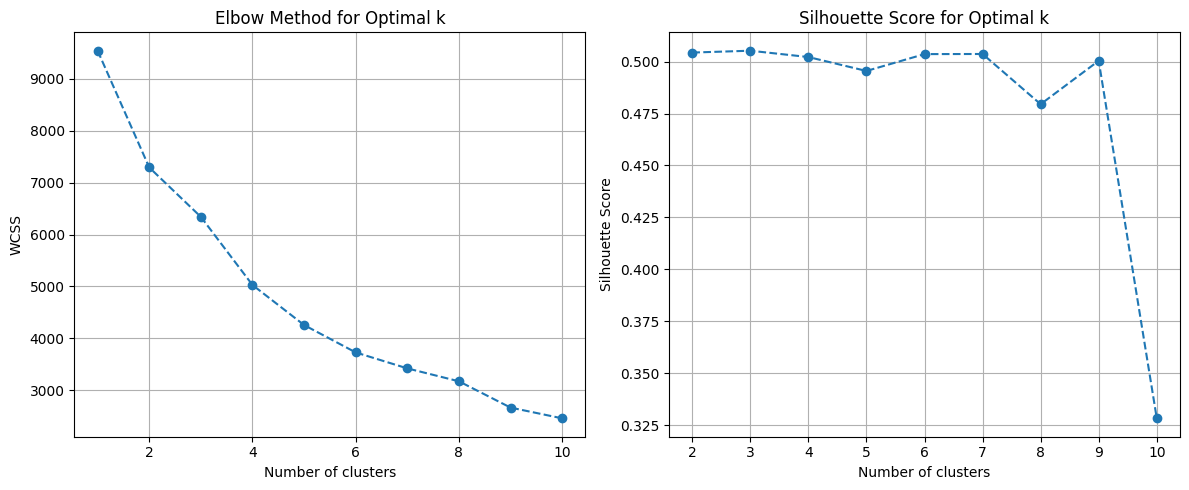

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()

plt.tight_layout()
plt.show()


In [32]:
optimal_k = 3 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_data)

merchant_stats_1['cluster'] = kmeans.labels_

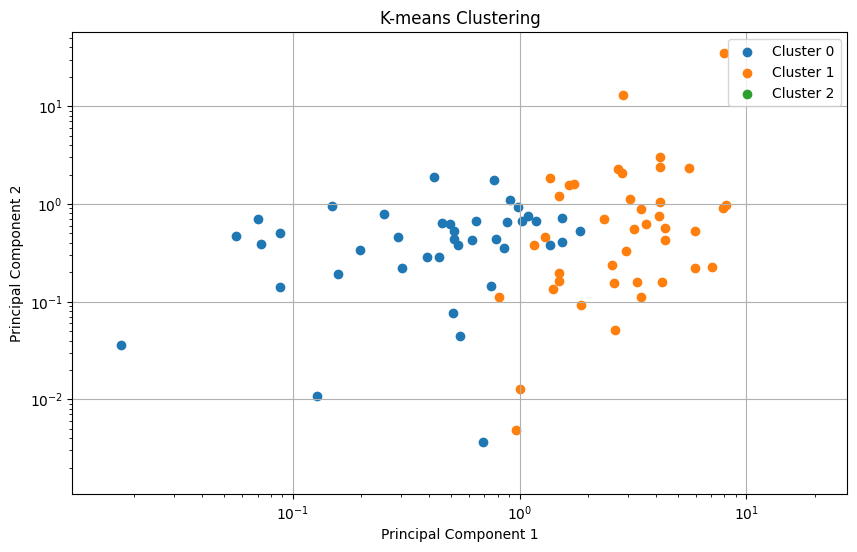

In [33]:
plt.figure(figsize=(10, 6))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['Cluster'] = kmeans.labels_

for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=merchant_stats_1.columns[:-1])
print("\nCluster Centers:")
cluster_centers



Cluster Centers:


,count_nep,count_npci,sum_nep,sum_npci,min_nep,min_npci,max_nep,max_npci,mean_nep,mean_npci,std_nep,std_npci
0,460.359455,6.558773,5.791846e+05,7700.404804,89.166320,248.592981,20044.256985,2344.847121,1786.811290,1092.035791,2737.686409,890.990161
1,2170.092233,12.223301,4.857262e+06,61951.801602,272.155485,897.792621,59976.145631,12592.999806,5992.933526,6068.544244,9200.340794,4858.028194
2,2.500000,22.000000,1.839900e+05,243942.800000,21995.000000,12.800000,111995.000000,16000.000000,65328.333333,10620.645714,45092.497528,5839.433203


In [35]:
kmeans.cluster_centers_

array([[-0.04316631, -0.14106996, -0.05087919, -0.30257267, -0.08769937,
        -0.1492226 , -0.22497155, -0.51129459, -0.20181882, -0.47514742,
        -0.23856762, -0.46961884],
       [ 0.12385637,  0.38931362,  0.14565122,  0.817758  ,  0.06882852,
         0.42869864,  0.62425833,  1.43670528,  0.47742152,  1.32508713,
         0.6270404 ,  1.32105897],
       [-0.0878943 ,  1.30472988, -0.06903401,  4.57600404, 18.65042617,
        -0.35912686,  1.73054121,  2.08431818, 10.05940574,  2.97179394,
         5.43443639,  1.76405452]])

In [36]:
unique_values, _, counts = np.unique(kmeans.labels_, return_index=True, return_counts=True)

print("Unique values:", unique_values)
print("Counts of unique values:", counts)


Unique values: [0 1 2]
Counts of unique values: [587 206   2]


In [37]:
suspicious_clusters = []

for cluster_label, cluster_center in enumerate(kmeans.cluster_centers_):

    if cluster_center[9] > 2 and cluster_center[2] < cluster_center[3]:  
        suspicious_clusters.append(cluster_label)


suspicious_merchants = merchant_stats_1[merchant_stats_1['cluster'].isin(suspicious_clusters)]
print("\nSuspicious Merchants:")
suspicious_merchants


Suspicious Merchants:


,count_nep,count_npci,sum_nep,sum_npci,min_nep,min_npci,max_nep,max_npci,mean_nep,mean_npci,std_nep,std_npci,cluster
merchant_id,,,,,,,,,,,,,
2cecf6aa-21d1-4304-b145-eb9e3e638e84,3.0,30.0,320000.0,357201.6,20000.0,1.6,200000.0,16000.0,106666.666667,11906.720000,90184.995056,4590.321782,2
918384dc-0376-49bf-82fe-4621ab2f6f4a,2.0,14.0,47980.0,130684.0,23990.0,24.0,23990.0,16000.0,23990.000000,9334.571429,0.000000,7088.544623,2


In [38]:
# # Identify suspicious clusters based on unusual transaction patterns
# suspicious_clusters = []
# 
# for cluster_label, cluster_center in enumerate(kmeans.cluster_centers_):
#     # Extract NPCI and NEP metrics from the cluster center
#     sum_nep = cluster_center[2]
#     sum_npci = cluster_center[3]
#     count_nep = cluster_center[0]
#     count_npci = cluster_center[1]
#     
#     # Define criteria for suspicion
#     unusual_sum = sum_npci > sum_nep
#     unusual_mean = count_npci < count_nep
#     
#     # If any criteria are met, mark the cluster as suspicious
#     if unusual_sum or unusual_mean:
#         suspicious_clusters.append(cluster_label)
# 
# # Flag merchants in suspicious clusters
# suspicious_merchants = merchant_stats_1[merchant_stats_1['cluster'].isin(suspicious_clusters)]
# 
# print("\nSuspicious Merchants:")
# suspicious_merchants

In [39]:
df['year_month'] = df['datetime'].dt.to_period('M').astype(str)

# Group by merchant_id and year_month
grouped = df.groupby(['merchant_id', 'year_month']).agg({
    'amount': ['count', 'sum', 'min', 'max', 'mean', 'std'],
    'datetime': 'first',
    'issuer_id':'first'# example of another column to keep in groupby
    # Add other aggregations as needed
})
# grouped = grouped.reset_index()

In [40]:
grouped.columns

MultiIndex([(   'amount', 'count'),
            (   'amount',   'sum'),
            (   'amount',   'min'),
            (   'amount',   'max'),
            (   'amount',  'mean'),
            (   'amount',   'std'),
            ( 'datetime', 'first'),
            ('issuer_id', 'first')],
           )

In [41]:
grouped.columns = ['count','sum','min','max','mean','std','datetime','issuer_id']

In [42]:
grouped['time_of_day'] = grouped['datetime'].dt.hour.map(categorize_time)

In [43]:
nep = grouped[grouped['issuer_id'] != "b92056d9-092b-4374-a84f-89304b67dec1"]
npci = grouped[grouped['issuer_id'] == "b92056d9-092b-4374-a84f-89304b67dec1"]

In [44]:
nep

count        sum     min  \
merchant_id                          year_month                             
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02        82   34185.00    25.0   
                                     2024-03      1341  741261.00     3.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02        28    5740.00    20.0   
                                     2024-03       244   61260.00    10.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02         2      35.00    10.0   
...                                                ...        ...     ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03       400  382560.71    30.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02         1    1480.00  1480.0   
                                     2024-03        47   31494.10     2.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02        15   29790.00   800.0   
                                     2024-03       275  362506.00    95.0   

                                                     max         mean  \
merchant_id                          year_month                         
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      4475.0   416.890244   
                                     2024-03     17512.0   552.767338   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02      1000.0   205.000000   
                                     2024-03      2000.0   251.065574   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02        25.0    17.500000   
...                                                  ...          ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03     12000.0   956.401775   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02      1480.0  1480.000000   
                                     2024-03      6000.0   670.087234   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02      4050.0  1986.000000   
                                     2024-03      6450.0  1318.203636   

                                                         std  \
merchant_id                          year_month                
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      581.085957   
                                     2024-03      970.960741   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02      245.835687   
                                     2024-03      267.706867   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02       10.606602   
...                                                      ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03     1099.565510   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02             NaN   
                                     2024-03     1328.440856   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02     1004.602267   
                                     2024-03      877.543529   

                                                           datetime  \
merchant_id                          year_month                       
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02    2024-02-28 13:00:32   
                                     2024-03    2024-03-01 08:10:37   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02    2024-02-28 18:11:22   
                                     2024-03    2024-03-01 12:22:05   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02    2024-02-28 16:20:16   
...                                                             ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03    2024-03-01 13:16:59   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02    2024-02-29 14:12:59   
                                     2024-03    2024-03-01 15:32:32   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02    2024-02-28 12:27:52   
                                     2024-03    2024-03-01 18:40:12   

                                                                            issuer_id  \
merchant_id                          year_month                                         
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02     e17695d5-eea1-43d4-b2fe-d7447ab7870a   
                                     2024-03     e17695d5-eea1-43d4-b2fe-

In [45]:
npci

,,count,sum,min,max,mean,std,datetime,issuer_id,time_of_day
merchant_id,year_month,,,,,,,,,
009c1279-8a1a-40cf-a83b-ccc05420f570,2024-03,4,36620.0,1600.0,16300.0,9155.000000,8090.988815,2024-03-04 17:26:52,b92056d9-092b-4374-a84f-89304b67dec1,Evening
020f022d-3ef4-4f1b-a34b-093481fe3d77,2024-03,3,3125.0,10.0,3105.0,1041.666667,1786.899083,2024-03-19 23:13:20,b92056d9-092b-4374-a84f-89304b67dec1,Night
031da543-5700-4b59-b173-49b2b568c3b3,2024-03,47,139205.0,10.0,20000.0,2961.808511,4568.129841,2024-03-01 17:22:06,b92056d9-092b-4374-a84f-89304b67dec1,Evening
043adc8d-9b4b-4bc8-8de3-2be96180621d,2024-03,10,7285.0,10.0,2750.0,728.500000,911.695764,2024-03-01 09:47:39,b92056d9-092b-4374-a84f-89304b67dec1,Morning
05ba479b-3ca1-487a-9210-7694ecd4ee50,2024-03,11,10867.0,2.0,2000.0,987.909091,930.968362,2024-03-01 11:24:13,b92056d9-092b-4374-a84f-89304b67dec1,Morning
...,...,...,...,...,...,...,...,...,...,...
fc6de459-6b6f-4efe-8a6e-3f0275537313,2024-03,3,9.0,2.0,5.0,3.000000,1.732051,2024-03-02 19:56:20,b92056d9-092b-4374-a84f-89304b67dec1,Evening
fc75d5f5-cf02-44cd-874e-4ee90e278059,2024-02,12,58320.0,100.0,13500.0,4860.000000,5394.625271,2024-02-28 16:40:49,b92056d9-092b-4374-a84f-89304b67dec1,Afternoon
fcd11106-8ad8-4727-a3cd-ef026c620ea6,2024-02,5,19200.0,100.0,10000.0,3840.000000,4245.350398,2024-02-28 21:40:23,b92056d9-092b-4374-a84f-89304b67dec1,Evening


In [46]:
df_merged = pd.concat([nep, npci], keys=['nep', 'npci'], names=['source']).reset_index(level=0)

In [80]:
grouped_stats = df_merged.groupby(['merchant_id', 'year_month','source']).agg({
    'count': 'mean',
    'sum': 'mean',
    'min': 'min',
    'max': 'max',
    'mean': 'mean', 
    'std': 'mean',   
    'time_of_day': lambda x: pd.Series.mode(x).iloc[0] 
}).unstack()

grouped_stats.columns = ['_'.join(col).strip() for col in grouped_stats.columns.values]
grouped_stats.fillna(0,inplace=True)

In [69]:
grouped_stats

count_nep  count_npci  \
merchant_id                          year_month                          
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          82.0         0.0   
                                     2024-03        1341.0         0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          28.0         0.0   
                                     2024-03         244.0         0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02           2.0         0.0   
...                                                    ...         ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03         400.0         0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02           1.0         0.0   
                                     2024-03          47.0         0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          15.0         0.0   
                                     2024-03         275.0         0.0   

                                                   sum_nep  sum_npci  min_nep  \
merchant_id                          year_month                                 
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      34185.00       0.0     25.0   
                                     2024-03     741261.00       0.0      3.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02       5740.00       0.0     20.0   
                                     2024-03      61260.00       0.0     10.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02         35.00       0.0     10.0   
...                                                    ...       ...      ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03     382560.71       0.0     30.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02       1480.00       0.0   1480.0   
                                     2024-03      31494.10       0.0      2.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02      29790.00       0.0    800.0   
                                     2024-03     362506.00       0.0     95.0   

                                                 min_npci  max_nep  max_npci  \
merchant_id                          year_month                                
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          0.0   4475.0       0.0   
                                     2024-03          0.0  17512.0       0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          0.0   1000.0       0.0   
                                     2024-03          0.0   2000.0       0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02          0.0     25.0       0.0   
...                                                   ...      ...       ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03          0.0  12000.0       0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02          0.0   1480.0       0.0   
                                     2024-03          0.0   6000.0       0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          0.0   4050.0       0.0   
                                     2024-03          0.0   6450.0       0.0   

                                                    mean_nep  mean_npci  \
merchant_id                          year_month                           
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      416.890244        0.0   
                                     2024-03      552.767338        0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02      205.000000        0.0   
                                     2024-03      251.065574        0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02       17.500000        0.0   
...                                                      ...        ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03      956.401775        0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02     1480.000000        0.0   
                                     2024-03      670.087234        0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02     1986.000000        0.0   
                                     2024-03     1318.203636        0.0   

               

In [49]:
npci_g_nep = grouped_stats[(grouped_stats['sum_nep'] < grouped_stats['sum_npci'])][['sum_nep', 'sum_npci']]
npci_g_nep

,,sum_nep,sum_npci
merchant_id,year_month,,
009c1279-8a1a-40cf-a83b-ccc05420f570,2024-03,0.0,36620.0
020f022d-3ef4-4f1b-a34b-093481fe3d77,2024-03,0.0,3125.0
031da543-5700-4b59-b173-49b2b568c3b3,2024-03,0.0,139205.0
043adc8d-9b4b-4bc8-8de3-2be96180621d,2024-03,0.0,7285.0
05ba479b-3ca1-487a-9210-7694ecd4ee50,2024-03,0.0,10867.0
...,...,...,...
fc6de459-6b6f-4efe-8a6e-3f0275537313,2024-03,0.0,9.0
fc75d5f5-cf02-44cd-874e-4ee90e278059,2024-02,0.0,58320.0
fcd11106-8ad8-4727-a3cd-ef026c620ea6,2024-02,0.0,19200.0


In [50]:
npci_g_nep.reset_index(inplace=True)
# npci_g_nep.year_month.max()

In [51]:
npci_g_nep.nunique()

merchant_id    253
year_month       2
sum_nep          1
sum_npci       270
dtype: int64

In [52]:
npci_g_nep.nunique()

merchant_id    253
year_month       2
sum_nep          1
sum_npci       270
dtype: int64

In [53]:
grouped.reset_index(inplace=True)

In [54]:
nep.reset_index(inplace=True)
nep

,merchant_id,year_month,count,sum,min,max,mean,std,datetime,issuer_id,time_of_day
0,001cb5a9-0d00-42ef-90e4-f25b0c964bbf,2024-02,82,34185.00,25.0,4475.0,416.890244,581.085957,2024-02-28 13:00:32,e17695d5-eea1-43d4-b2fe-d7447ab7870a,Afternoon
1,001cb5a9-0d00-42ef-90e4-f25b0c964bbf,2024-03,1341,741261.00,3.0,17512.0,552.767338,970.960741,2024-03-01 08:10:37,e17695d5-eea1-43d4-b2fe-d7447ab7870a,Morning
2,00369301-6b29-41c3-b37a-5d1f9b782d9b,2024-02,28,5740.00,20.0,1000.0,205.000000,245.835687,2024-02-28 18:11:22,12163973-2702-4645-b87a-a9cd109f2fc4,Evening
3,00369301-6b29-41c3-b37a-5d1f9b782d9b,2024-03,244,61260.00,10.0,2000.0,251.065574,267.706867,2024-03-01 12:22:05,1ddbeb18-a18a-4540-bfcd-6e5796a89019,Afternoon
4,00524c08-cbbe-4ccc-a0c4-8d1bef218908,2024-02,2,35.00,10.0,25.0,17.500000,10.606602,2024-02-28 16:20:16,e398055b-ce16-498f-928a-0fb6d289dc16,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...
1681,fe822416-7ed2-4529-8df4-83aa6e49745c,2024-03,400,382560.71,30.0,12000.0,956.401775,1099.565510,2024-03-01 13:16:59,305377b2-2a0b-4f88-a566-0a34d828e23a,Afternoon
1682,ffd6c24e-8213-40b0-ab01-ba7c3b8231bf,2024-02,1,1480.00,1480.0,1480.0,1480.000000,NaN,2024-02-29 14:12:59,e17695d5-eea1-43d4-b2fe-d7447ab7870a,Afternoon
1683,ffd6c24e-8213-40b0-ab01-ba7c3b8231bf,2024-03,47,31494.10,2.0,6000.0,670.087234,1328.440856,2024-03-01 15:32:32,e17695d5-eea1-43d4-b2fe-d7447ab7870a,Afternoon
1684,ffdb1d40-84f9-4705-bffc-2342a78ece3e,2024-02,15,29790.00,800.0,4050.0,1986.000000,1004.602267,2024-02-28 12:27:52,e7bf02fa-6176-4f11-925f-2534697c2f98,Afternoon


In [61]:
grouped_stats = grouped_stats.reset_index()

In [65]:
grouped_stats.columns

Index(['merchant_id', 'year_month', 'count_nep', 'count_npci', 'sum_nep',
       'sum_npci', 'min_nep', 'min_npci', 'max_nep', 'max_npci', 'mean_nep',
       'mean_npci', 'std_nep', 'std_npci', 'time_of_day_nep',
       'time_of_day_npci'],
      dtype='object')

In [81]:
time_of_day_mapping = {
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
}

# Apply the mapping to the columns
grouped_stats['time_of_day_nep'] = grouped_stats['time_of_day_nep'].map(time_of_day_mapping)
grouped_stats['time_of_day_npci'] = grouped_stats['time_of_day_npci'].map(time_of_day_mapping)

In [82]:
grouped_stats

count_nep  count_npci  \
merchant_id                          year_month                          
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          82.0         0.0   
                                     2024-03        1341.0         0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          28.0         0.0   
                                     2024-03         244.0         0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02           2.0         0.0   
...                                                    ...         ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03         400.0         0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02           1.0         0.0   
                                     2024-03          47.0         0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          15.0         0.0   
                                     2024-03         275.0         0.0   

                                                   sum_nep  sum_npci  min_nep  \
merchant_id                          year_month                                 
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      34185.00       0.0     25.0   
                                     2024-03     741261.00       0.0      3.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02       5740.00       0.0     20.0   
                                     2024-03      61260.00       0.0     10.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02         35.00       0.0     10.0   
...                                                    ...       ...      ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03     382560.71       0.0     30.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02       1480.00       0.0   1480.0   
                                     2024-03      31494.10       0.0      2.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02      29790.00       0.0    800.0   
                                     2024-03     362506.00       0.0     95.0   

                                                 min_npci  max_nep  max_npci  \
merchant_id                          year_month                                
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          0.0   4475.0       0.0   
                                     2024-03          0.0  17512.0       0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          0.0   1000.0       0.0   
                                     2024-03          0.0   2000.0       0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02          0.0     25.0       0.0   
...                                                   ...      ...       ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03          0.0  12000.0       0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02          0.0   1480.0       0.0   
                                     2024-03          0.0   6000.0       0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          0.0   4050.0       0.0   
                                     2024-03          0.0   6450.0       0.0   

                                                    mean_nep  mean_npci  \
merchant_id                          year_month                           
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      416.890244        0.0   
                                     2024-03      552.767338        0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02      205.000000        0.0   
                                     2024-03      251.065574        0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02       17.500000        0.0   
...                                                      ...        ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03      956.401775        0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02     1480.000000        0.0   
                                     2024-03      670.087234        0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02     1986.000000        0.0   
                                     2024-03     1318.203636        0.0   

               

In [83]:
grouped_stats.fillna(0,inplace=True)

In [74]:
grouped_stats.columns

Index(['count_nep', 'count_npci', 'sum_nep', 'sum_npci', 'min_nep', 'min_npci',
       'max_nep', 'max_npci', 'mean_nep', 'mean_npci', 'std_nep', 'std_npci',
       'time_of_day_nep', 'time_of_day_npci'],
      dtype='object')

In [86]:
grouped_stats['count_diff'] = grouped_stats['count_nep'] - grouped_stats['count_npci']
grouped_stats['sum_diff'] = grouped_stats['sum_nep'] - grouped_stats['sum_npci']
grouped_stats['mean_diff'] = grouped_stats['mean_nep'] - grouped_stats['mean_npci']
grouped_stats['std_diff'] = grouped_stats['std_nep'] - grouped_stats['std_npci']
grouped_stats['min_diff'] = grouped_stats['min_nep'] - grouped_stats['min_npci']
grouped_stats['max_diff'] = grouped_stats['max_nep'] - grouped_stats['max_npci']

In [89]:
grouped_stats

count_nep  count_npci  \
merchant_id                          year_month                          
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          82.0         0.0   
                                     2024-03        1341.0         0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          28.0         0.0   
                                     2024-03         244.0         0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02           2.0         0.0   
...                                                    ...         ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03         400.0         0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02           1.0         0.0   
                                     2024-03          47.0         0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          15.0         0.0   
                                     2024-03         275.0         0.0   

                                                   sum_nep  sum_npci  min_nep  \
merchant_id                          year_month                                 
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      34185.00       0.0     25.0   
                                     2024-03     741261.00       0.0      3.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02       5740.00       0.0     20.0   
                                     2024-03      61260.00       0.0     10.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02         35.00       0.0     10.0   
...                                                    ...       ...      ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03     382560.71       0.0     30.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02       1480.00       0.0   1480.0   
                                     2024-03      31494.10       0.0      2.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02      29790.00       0.0    800.0   
                                     2024-03     362506.00       0.0     95.0   

                                                 min_npci  max_nep  max_npci  \
merchant_id                          year_month                                
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          0.0   4475.0       0.0   
                                     2024-03          0.0  17512.0       0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          0.0   1000.0       0.0   
                                     2024-03          0.0   2000.0       0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02          0.0     25.0       0.0   
...                                                   ...      ...       ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03          0.0  12000.0       0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02          0.0   1480.0       0.0   
                                     2024-03          0.0   6000.0       0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          0.0   4050.0       0.0   
                                     2024-03          0.0   6450.0       0.0   

                                                    mean_nep  mean_npci  \
merchant_id                          year_month                           
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      416.890244        0.0   
                                     2024-03      552.767338        0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02      205.000000        0.0   
                                     2024-03      251.065574        0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02       17.500000        0.0   
...                                                      ...        ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03      956.401775        0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02     1480.000000        0.0   
                                     2024-03      670.087234        0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02     1986.000000        0.0   
                                     2024-03     1318.203636        0.0   

               

In [90]:
grouped_stats['normalized_sum_ratio'] = grouped_stats['sum_nep'] / (grouped_stats['sum_nep'] + grouped_stats['sum_npci'])
grouped_stats['normalized_count_ratio'] = grouped_stats['count_nep'] / (grouped_stats['count_nep'] + grouped_stats['count_npci'])
grouped_stats['normalized_mean_ratio'] = grouped_stats['mean_nep'] / (grouped_stats['mean_nep'] + grouped_stats['mean_npci'])

In [91]:
grouped_statss

count_nep  count_npci  \
merchant_id                          year_month                          
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          82.0         0.0   
                                     2024-03        1341.0         0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          28.0         0.0   
                                     2024-03         244.0         0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02           2.0         0.0   
...                                                    ...         ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03         400.0         0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02           1.0         0.0   
                                     2024-03          47.0         0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          15.0         0.0   
                                     2024-03         275.0         0.0   

                                                   sum_nep  sum_npci  min_nep  \
merchant_id                          year_month                                 
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      34185.00       0.0     25.0   
                                     2024-03     741261.00       0.0      3.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02       5740.00       0.0     20.0   
                                     2024-03      61260.00       0.0     10.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02         35.00       0.0     10.0   
...                                                    ...       ...      ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03     382560.71       0.0     30.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02       1480.00       0.0   1480.0   
                                     2024-03      31494.10       0.0      2.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02      29790.00       0.0    800.0   
                                     2024-03     362506.00       0.0     95.0   

                                                 min_npci  max_nep  max_npci  \
merchant_id                          year_month                                
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02          0.0   4475.0       0.0   
                                     2024-03          0.0  17512.0       0.0   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02          0.0   1000.0       0.0   
                                     2024-03          0.0   2000.0       0.0   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02          0.0     25.0       0.0   
...                                                   ...      ...       ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03          0.0  12000.0       0.0   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02          0.0   1480.0       0.0   
                                     2024-03          0.0   6000.0       0.0   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02          0.0   4050.0       0.0   
                                     2024-03          0.0   6450.0       0.0   

                                                    mean_nep  mean_npci  ...  \
merchant_id                          year_month                          ...   
001cb5a9-0d00-42ef-90e4-f25b0c964bbf 2024-02      416.890244        0.0  ...   
                                     2024-03      552.767338        0.0  ...   
00369301-6b29-41c3-b37a-5d1f9b782d9b 2024-02      205.000000        0.0  ...   
                                     2024-03      251.065574        0.0  ...   
00524c08-cbbe-4ccc-a0c4-8d1bef218908 2024-02       17.500000        0.0  ...   
...                                                      ...        ...  ...   
fe822416-7ed2-4529-8df4-83aa6e49745c 2024-03      956.401775        0.0  ...   
ffd6c24e-8213-40b0-ab01-ba7c3b8231bf 2024-02     1480.000000        0.0  ...   
                                     2024-03      670.087234        0.0  ...   
ffdb1d40-84f9-4705-bffc-2342a78ece3e 2024-02     1986.000000        0.0  ...   
                               